Импорт данных

In [4]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.tsa.api as smt

students = pd.read_csv('data/StudentsPerformance.csv')
students = students[['math score']]
students.reset_index(inplace= True )
df = students.rename(columns={'index': 'i', 'math score': 'x'})

4.1 Предсказание ARMA и ARMA

In [5]:
from statsmodels.tsa.arima.model import ARIMA

arma_model = ARIMA(df['x'], order=(5,0,3))
arma_model_fit = arma_model.fit()

C:\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [6]:
print(arma_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      x   No. Observations:                 1000
Model:                 ARIMA(5, 0, 3)   Log Likelihood               -4130.014
Date:                Fri, 08 Dec 2023   AIC                           8280.028
Time:                        18:58:27   BIC                           8329.106
Sample:                             0   HQIC                          8298.681
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.0623      0.537    123.116      0.000      65.011      67.114
ar.L1          0.4987      0.235      2.122      0.034       0.038       0.959
ar.L2         -0.5908      0.102     -5.791      0.0

In [7]:
X = df['x'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
arma_predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    arma_predictions.append(yhat)
    obs = test[t]
    history.append(obs)

In [8]:
print(len(train))
print(len(test))
print(len(arma_predictions))

660
340
340


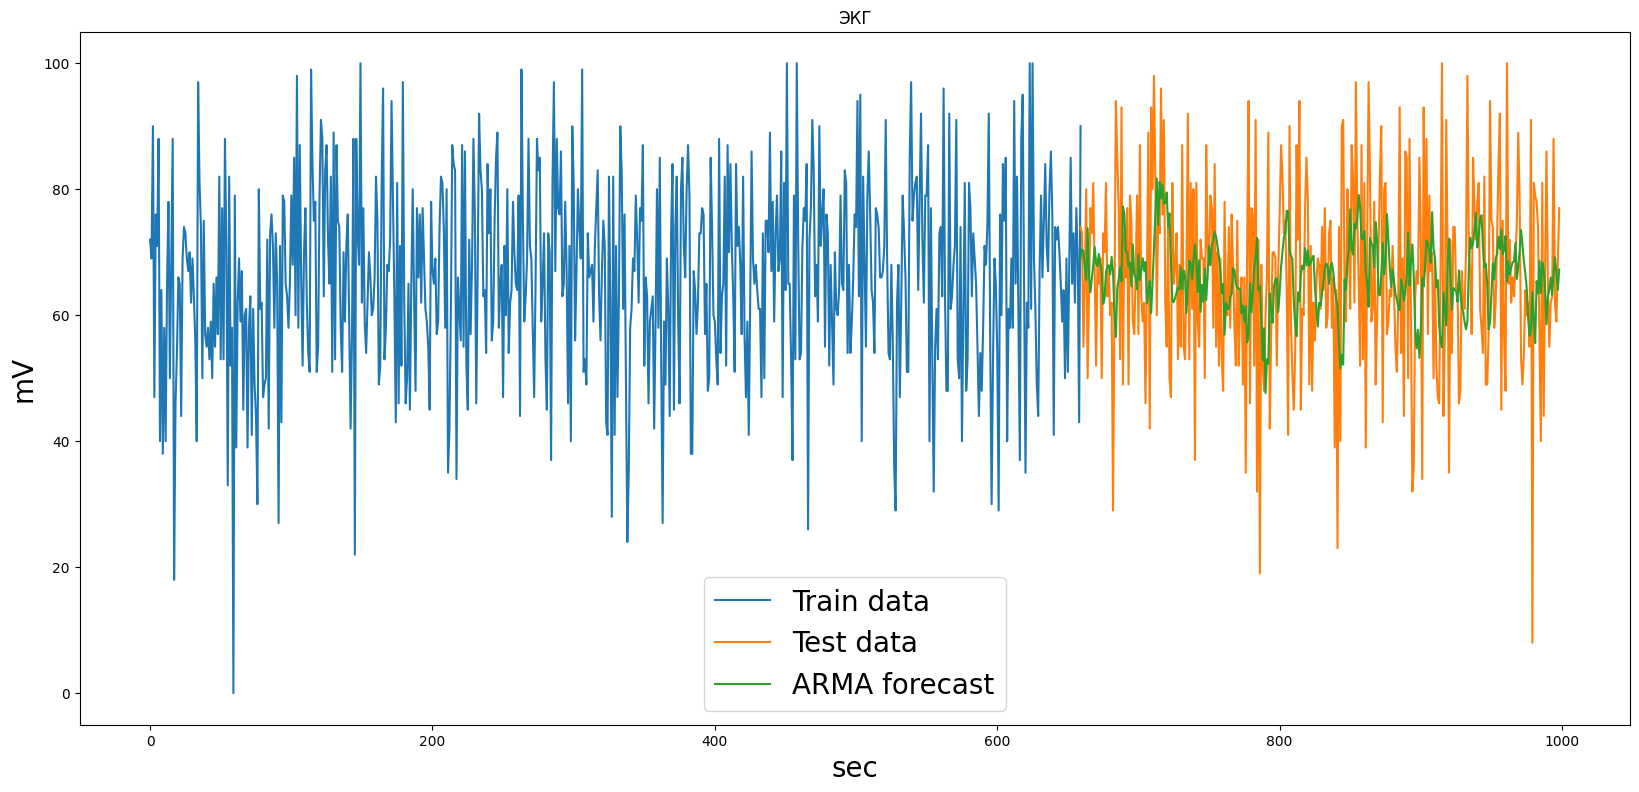

In [9]:
fig = plt.figure(figsize=(20, 9))
dur = len(arma_predictions)

plt.plot([i for i in range(0, size)], train, label='Train data')
plt.plot([i for i in range(size - 1, size - 1 + dur)], test[:dur], label='Test data')
plt.plot([i for i in range(size - 1, size - 1 + dur)], arma_predictions, label='ARMA forecast')
plt.legend(fontsize="20")
plt.title('ЭКГ')
plt.ylabel('mV', fontsize="20")
plt.xlabel('sec', fontsize="20")
plt.show()

In [15]:
from IPython.display import clear_output
%matplotlib inline
students = pd.read_csv('data/StudentsPerformance.csv')
students = students[['reading score']]
students.reset_index(inplace= True )
pdf = students.rename(columns={'index': 'i', 'reading score': 'x'})
p_arma_model = ARIMA(pdf['x'], order=(5,0,3))
p_arma_model_fit = p_arma_model.fit()

C:\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


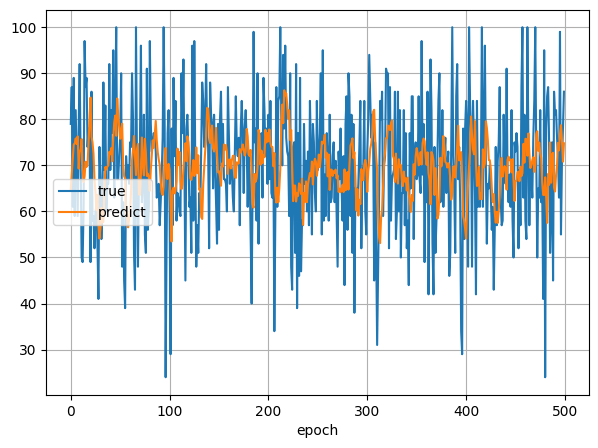

In [16]:
def live_plot(data_dict, figsize=(7,5), title=''):
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    for label,data in data_dict.items():
        plt.plot(data, label=label)
    plt.title(title)
    plt.grid(True)
    plt.xlabel('epoch')
    plt.legend(loc='center left')
    plt.show()

series = pdf["x"]
size = int(series.shape[0] * 0.5)
train, test = series[:size], series[size:len(series)]
history = [x for x in train.values]
predictions = []

val = {"true":[], "predict":[]}
for t in test.values:
    model = ARIMA(history, order=(5,1,0)).fit()
    output = model.forecast()
    yhat = output[0]
    predictions.append(yhat)
    val["predict"].append(yhat)
    val["true"].append(t)
    history.append(t)
    live_plot(val)

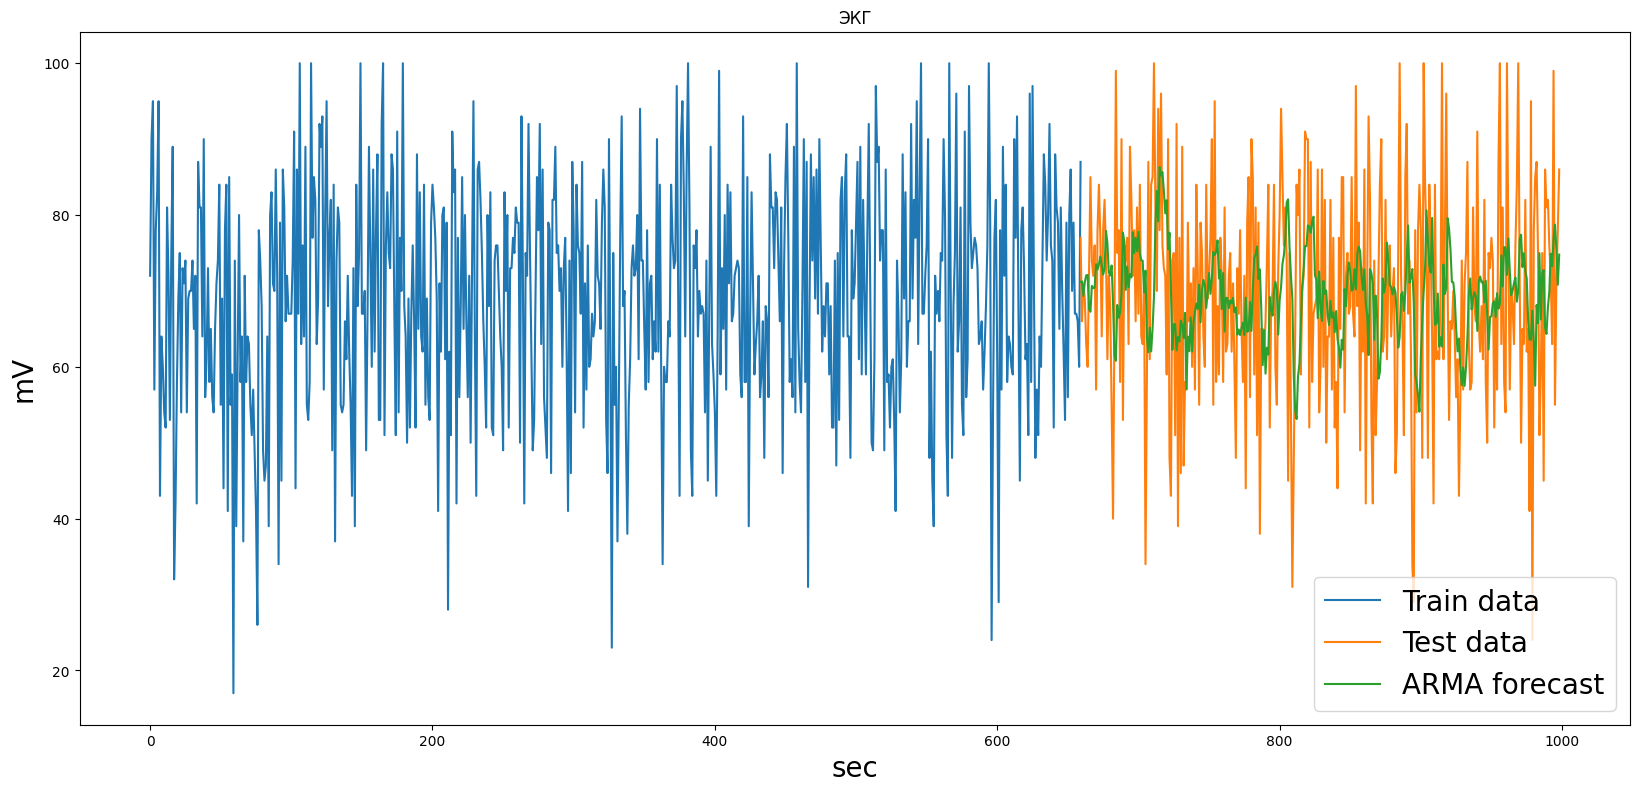

In [17]:
X = pdf['x'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
arma_predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    arma_predictions.append(yhat)
    obs = test[t]
    history.append(obs)

fig = plt.figure(figsize=(20, 9))
dur = len(arma_predictions)

plt.plot([i for i in range(0, size)], train, label='Train data')
plt.plot([i for i in range(size - 1, size - 1 + dur)], test[:dur], label='Test data')
plt.plot([i for i in range(size - 1, size - 1 + dur)], arma_predictions, label='ARMA forecast')
plt.legend(fontsize="20")
plt.title('ЭКГ')
plt.ylabel('mV', fontsize="20")
plt.xlabel('sec', fontsize="20")
plt.show()

In [18]:
arima_model = ARIMA(pdf['x'], order=(10,2,10))
arima_model_fit = arima_model.fit()
print(arima_model_fit.summary())

C:\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      x   No. Observations:                 1000
Model:               ARIMA(10, 2, 10)   Log Likelihood               -4094.321
Date:                Fri, 08 Dec 2023   AIC                           8230.641
Time:                        19:09:30   BIC                           8333.662
Sample:                             0   HQIC                          8269.800
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -3.6754      0.517     -7.114      0.000      -4.688      -2.663
ar.L2         -7.4297      1.492     -4.980      0.000     -10.354      -4.505
ar.L3        -10.5278      2.669     -3.944      0.0

In [20]:
output = arima_model_fit.forecast()
X = pdf['x'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
arima_predictions = list()
# walk-forward validation
for t in range(len(test)):
    arima_model = ARIMA(history, order=(10,2,5))
    arima_model_fit = arima_model.fit()
    output = arima_model_fit.forecast()
    yhat = output[0]
    arima_predictions.append(yhat)
    obs = test[t]
    history.append(obs)

C:\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization

LinAlgError: LU decomposition error.

ValueError: x and y must have same first dimension, but have shapes (340,) and (14,)

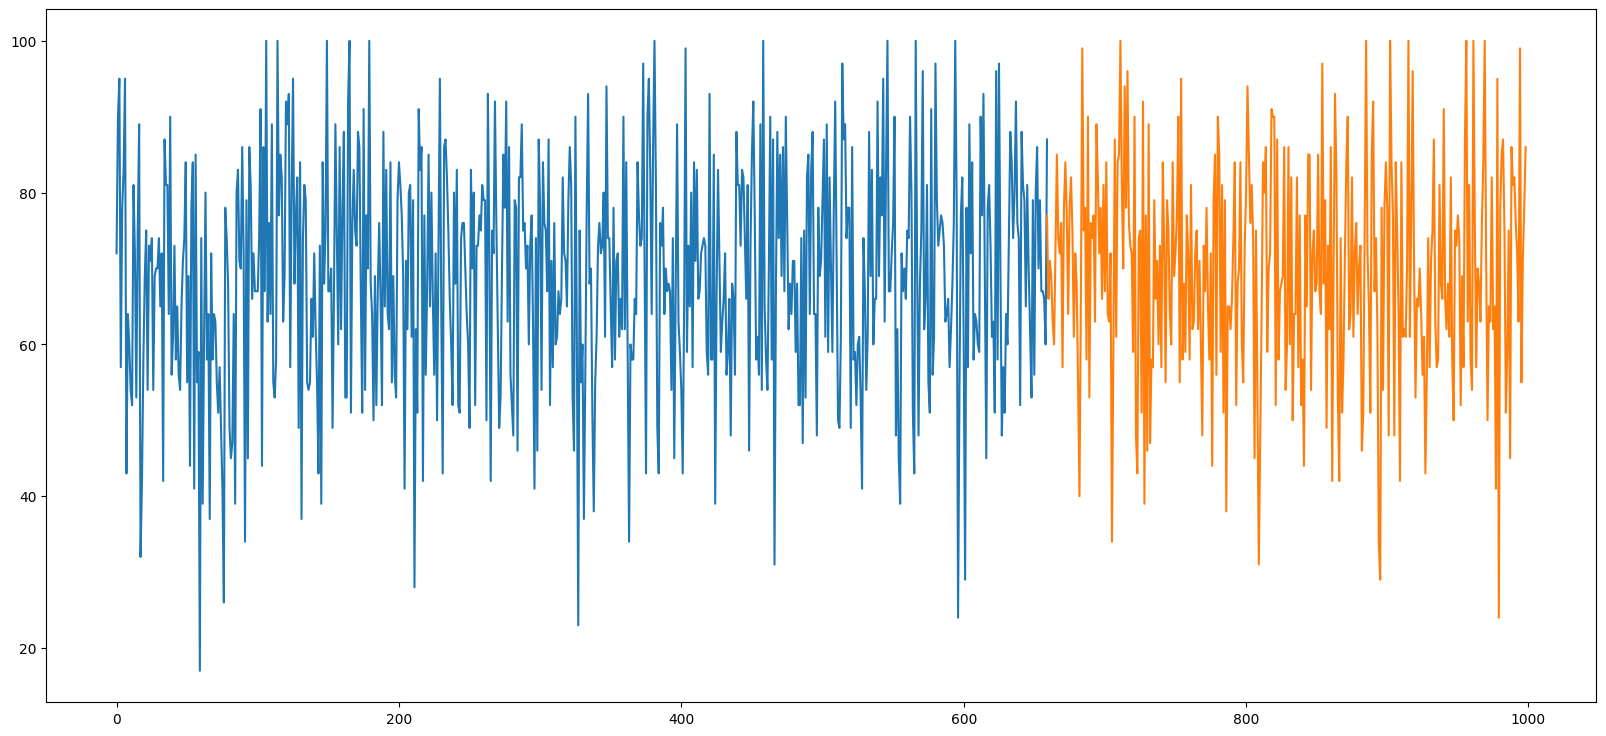

In [21]:
fig = plt.figure(figsize=(20, 9))
plt.plot([i for i in range(0, size)], train, label='Train data')
plt.plot([i for i in range(size - 1, len(X) - 1)], test, label='Test data')
plt.plot([i for i in range(size - 1, len(X) - 1)], arima_predictions, label='ARIMA forecast')
plt.legend(fontsize="20")
plt.title('Airline passengers by month')
plt.ylabel('Total passengers', fontsize="20")
plt.xlabel('Month', fontsize="20")
plt.show()

4.2 Оценка метрик (Сравнение ARMA и ARIMA)

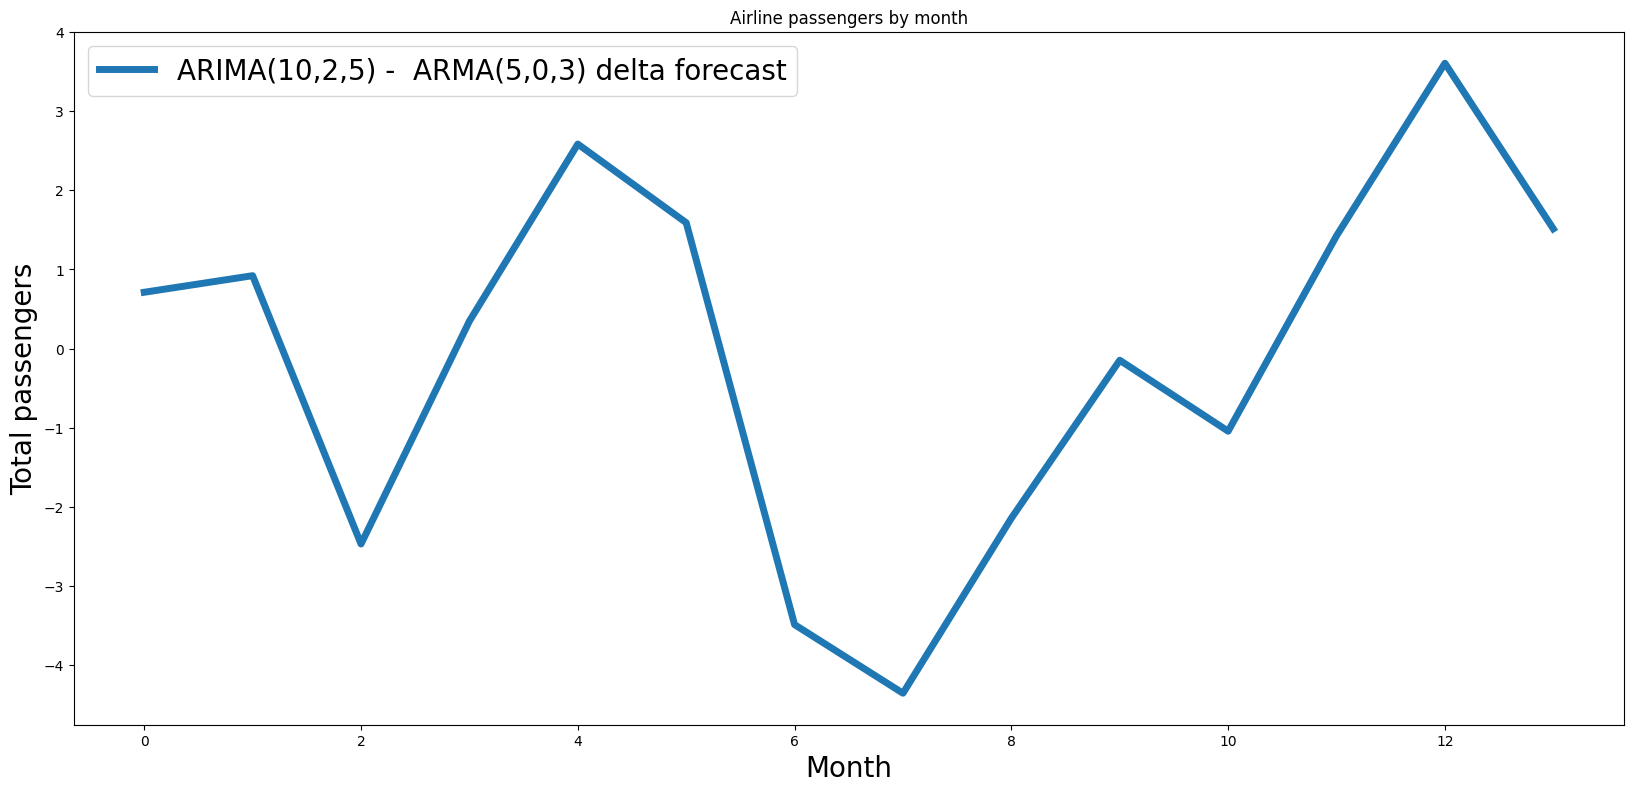

In [22]:
fig = plt.figure(figsize=(20, 9))
delta = []
for i in range(len(arima_predictions)):
    delta.append(arma_predictions[i] - arima_predictions[i])

plt.plot(delta, label='ARIMA(10,2,5) -  ARMA(5,0,3) delta forecast', linewidth=5)
plt.legend(fontsize="20")
plt.title('Airline passengers by month')
plt.ylabel('Total passengers', fontsize="20")
plt.xlabel('Month', fontsize="20")
plt.show()

4.3 Делаем пропуски

<Axes: >

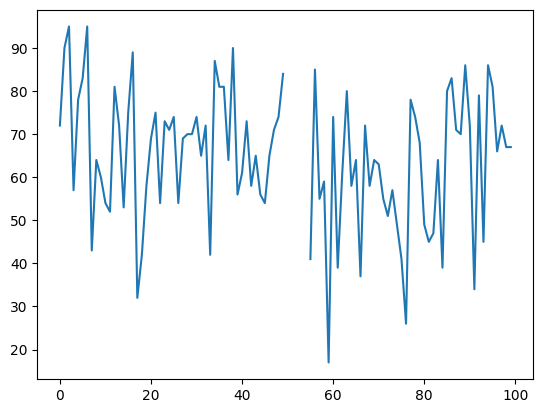

In [25]:
o_df = pdf.copy()
o_df["x"][50:55] = np.nan
o_df["x"][0:100].plot()

4.4 Заполнение пропусков

а) средним и медианой

<Axes: title={'center': 'среднее из предыдущего и последующего'}>

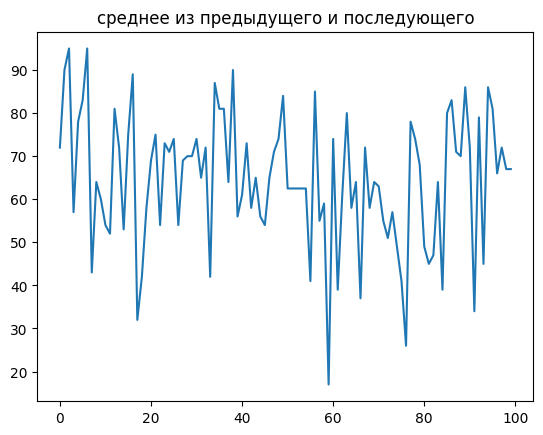

In [26]:
new_value = (o_df["x"][55] + o_df["x"][49])/2
o_df["x"][50:55] = new_value
o_df["x"][0:100].plot(title="среднее из предыдущего и последующего")

б) предыдущим и последующим значениями

<Axes: title={'center': 'Предыдущее значение'}>

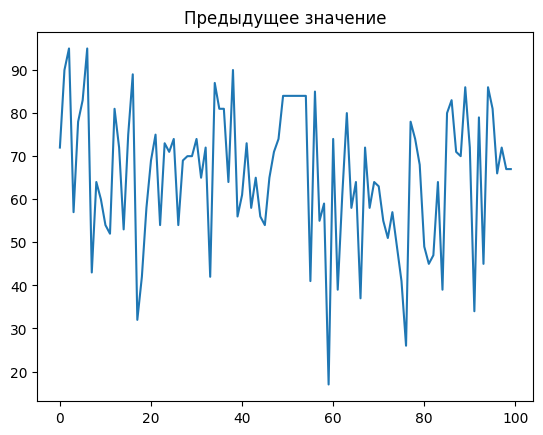

In [27]:
new_value = o_df["x"][49]
o_df["x"][50:55] = new_value
o_df["x"][0:100].plot(title='Предыдущее значение')

<Axes: title={'center': 'Последующее значение'}>

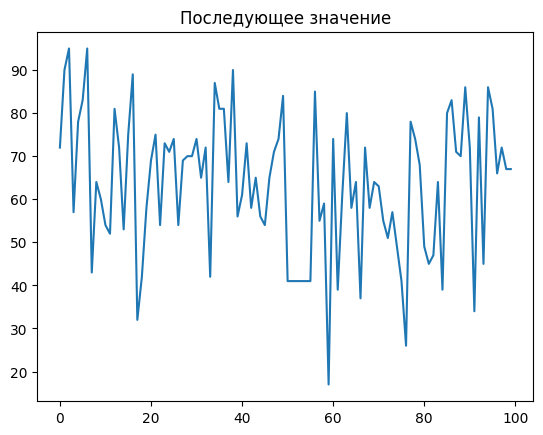

In [28]:
new_value = o_df["x"][55]
o_df["x"][50:55] = new_value
o_df["x"][0:100].plot(title='Последующее значение')

в) скользящим средним и медианой

<Axes: title={'center': 'среднее'}>

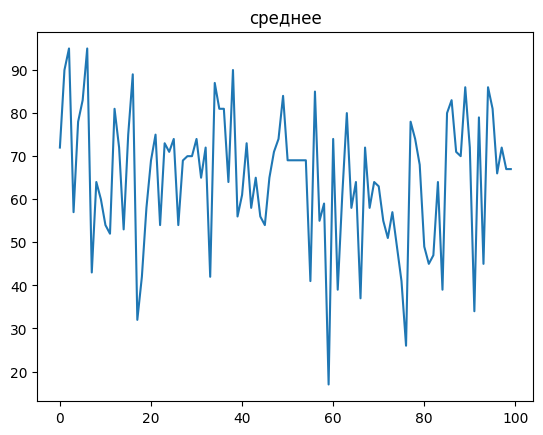

In [29]:
new_value = o_df["x"].mean()
o_df["x"][50:55] = new_value
o_df["x"][0:100].plot(title='среднее') 

<Axes: title={'center': 'медиана'}>

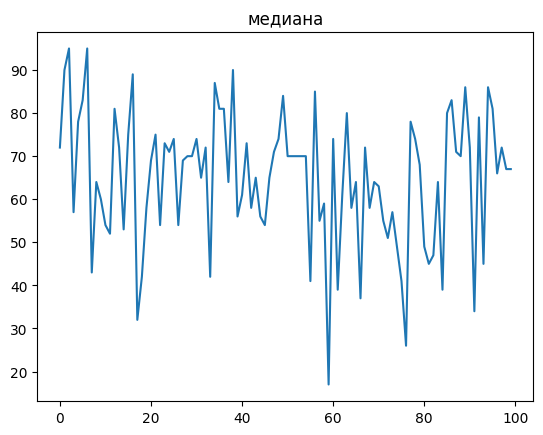

In [30]:
new_value = o_df["x"].median()
o_df["x"][50:55] = new_value
o_df["x"][0:100].plot(title='медиана') 

г) интерполяцией

<Axes: title={'center': 'zero'}>

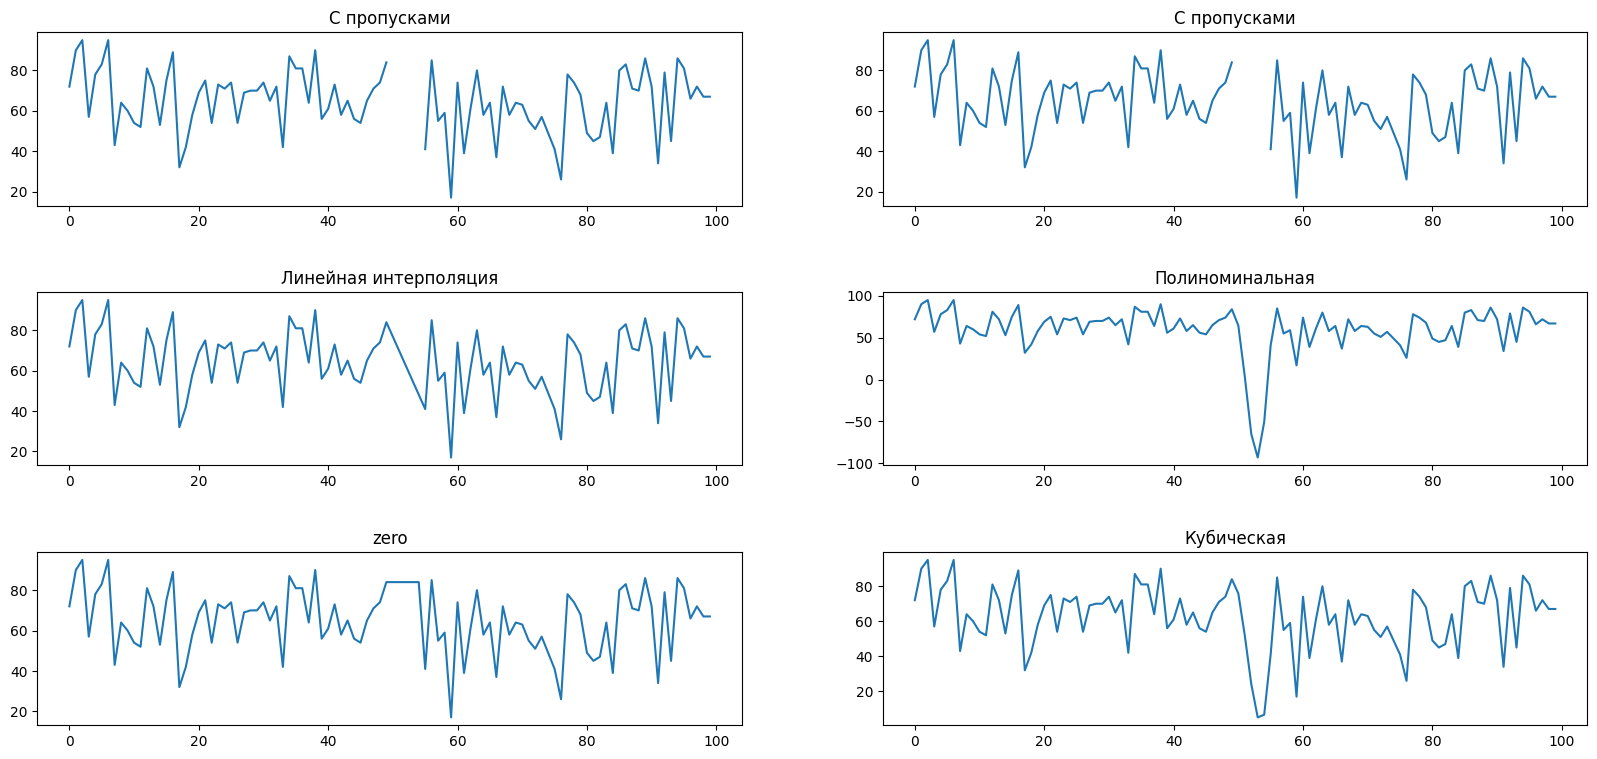

In [32]:
o_df["x"][50:55] = np.nan
lin_df = o_df.interpolate(method="linear")
cub_df = o_df.interpolate(method="cubic")
pol_df = o_df.interpolate(method="polynomial", order=5)
zero_df = o_df.interpolate(method="zero")

fig = plt.figure(figsize=(20, 9))
layout = (3, 2)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

original_ax = plt.subplot2grid(layout, (0, 0))
lin_ax = plt.subplot2grid(layout, (1, 0))
cub_ax = plt.subplot2grid(layout, (2, 1))

pol_ax = plt.subplot2grid(layout, (1, 1))
zero_ax = plt.subplot2grid(layout, (2, 0))
 
o_df["x"][0:100].plot(title="С пропусками", ax = original_ax)  
o_df["x"][0:100].plot(title="С пропусками", ax = plt.subplot2grid(layout, (0, 1)))  
lin_df["x"][0:100].plot(title="Линейная интерполяция", ax = lin_ax) 
cub_df["x"][0:100].plot(title="Кубическая", ax = cub_ax) 
pol_df["x"][0:100].plot(title="Полиноминальная", ax = pol_ax) 
zero_df["x"][0:100].plot(title="zero", ax=zero_ax)

4.5 Поиск выбросов

<Axes: >

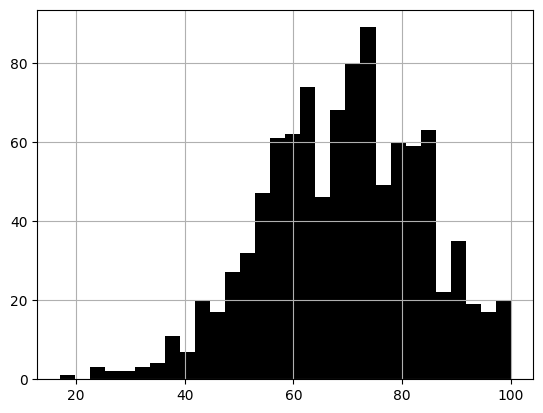

In [33]:
import seaborn as sns
pdf["x"].hist(bins=30, color="black")

<Axes: >

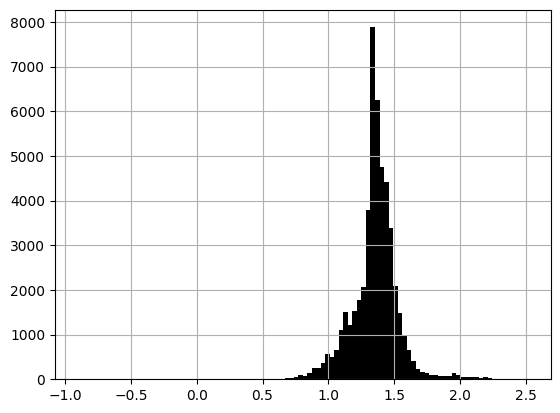

In [34]:
ecg["1"].hist(bins=100, color="black",)

Text(0.5, 1.0, 'Баллы')

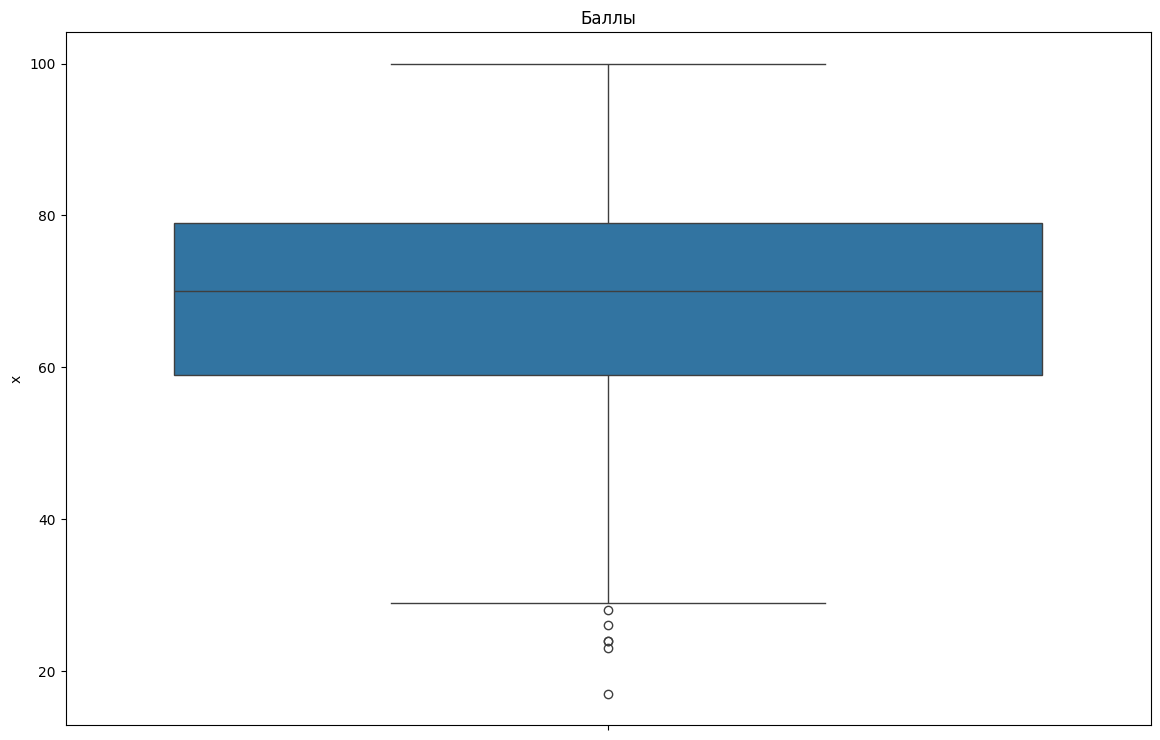

In [38]:
fig = plt.figure(figsize=(14, 9))
sns.boxplot(pdf.x).set_title('Баллы')

Text(0.5, 1.0, 'ЭКГ')

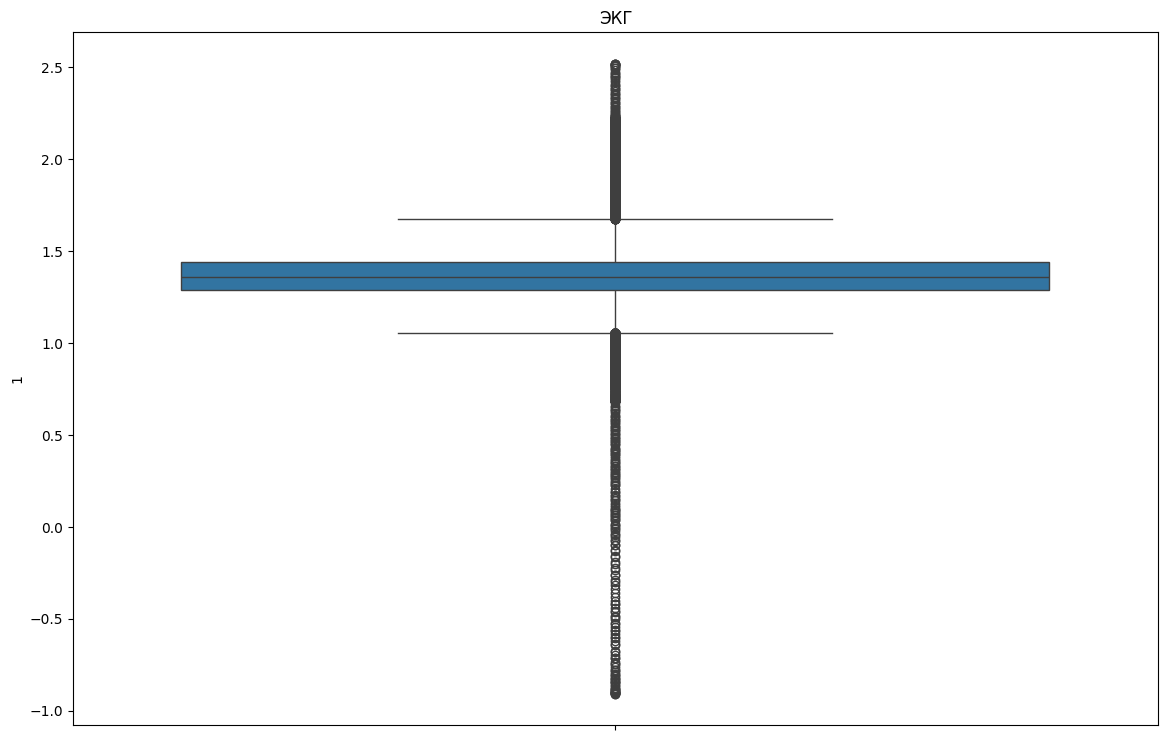

In [39]:
fig = plt.figure(figsize=(14, 9))
ax = sns.boxplot(ecg["1"])
ax.set_title('ЭКГ')

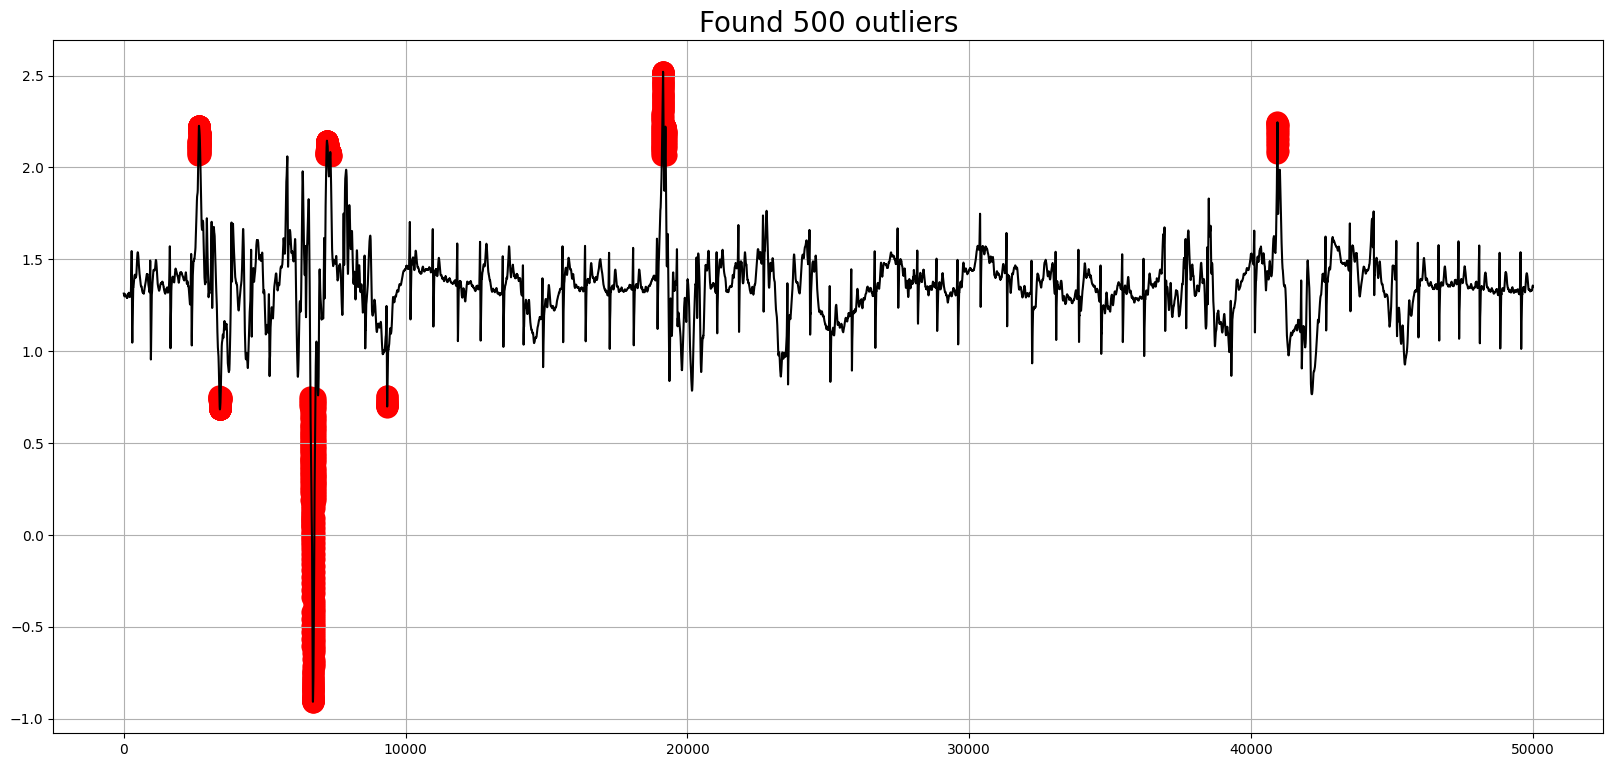

In [40]:
from sklearn import preprocessing, svm

scaler = preprocessing.StandardScaler()
perc = 0.01
local_df = ecg["1"]

ts_scaled = scaler.fit_transform(local_df.values.reshape(-1,1))
model = svm.OneClassSVM(nu=perc, kernel="rbf", gamma=0.01)
model.fit(ts_scaled)
dtf_outliers =local_df.to_frame(name="ts")
dtf_outliers["index"] = range(len(local_df))
dtf_outliers["outlier"] = model.predict(ts_scaled)
dtf_outliers["outlier"] = dtf_outliers["outlier"].apply(lambda x: 1 if x==-1 else 0)
fig, ax = plt.subplots(figsize=(20, 9))
ax.plot(dtf_outliers["index"], dtf_outliers["ts"], color="black")
ax.scatter(x=dtf_outliers[dtf_outliers["outlier"]==1]["index"], y=dtf_outliers[dtf_outliers["outlier"]==1]['ts'], color='red', linewidths=10)
plt.title(f"Found {sum(dtf_outliers['outlier']==1)} outliers", fontdict={'fontsize': 20})
ax.grid(True)
plt.show()

4.6 Убираем выбросы интерполяцией

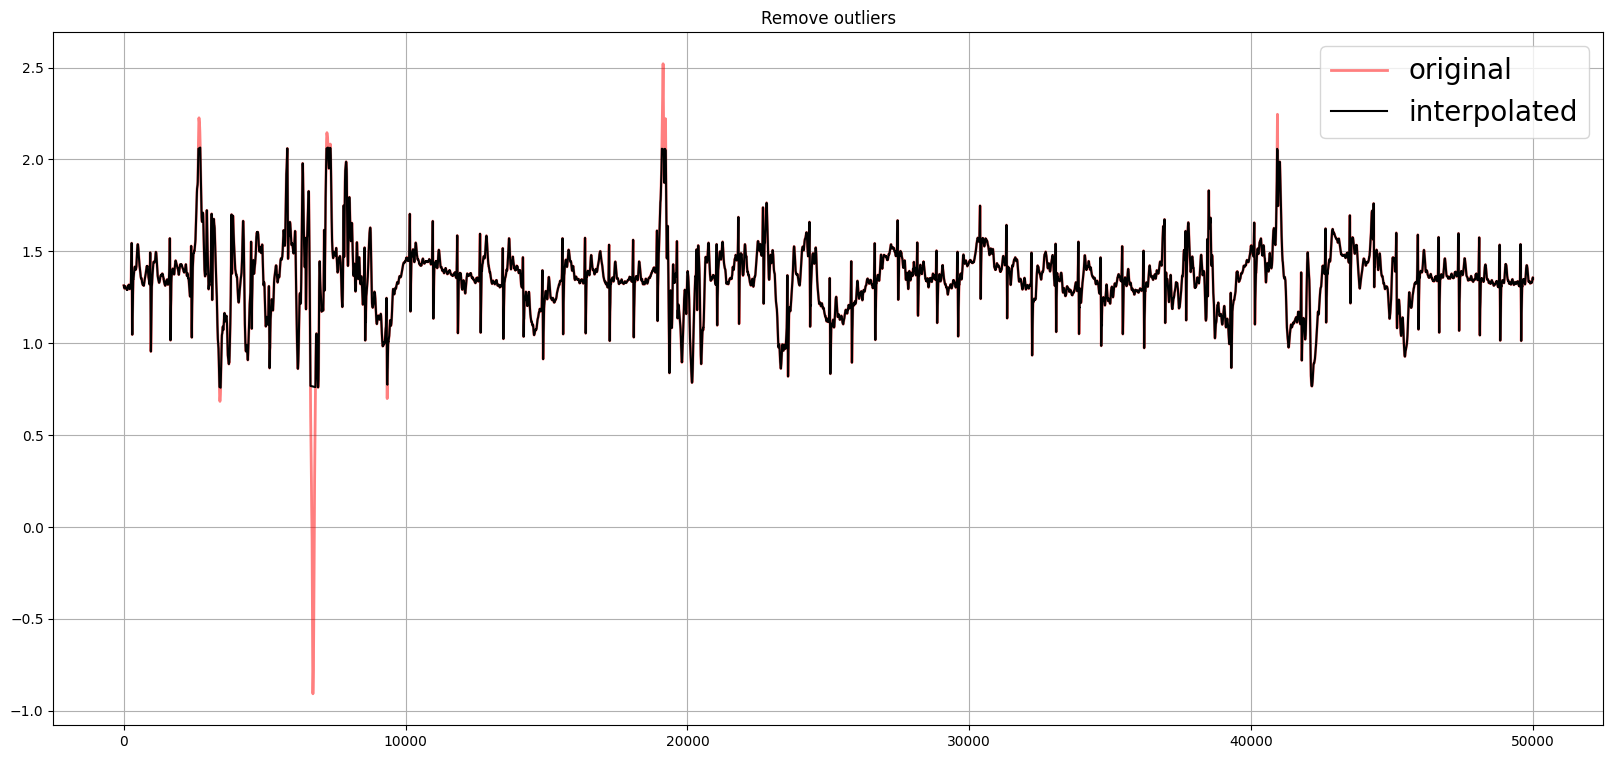

In [41]:
outliers_idx = dtf_outliers[dtf_outliers["outlier"]==1].index

ts_clean = local_df.copy()
ts_clean.loc[outliers_idx] = np.nan
ts_clean = ts_clean.interpolate(method="linear")
ax = local_df.plot(figsize=(20, 9), color="red", alpha=0.5, title="Remove outliers", label="original", legend=True, linewidth=2)
ts_clean.plot(ax=ax, grid=True, color="black", label="interpolated", legend=True)
plt.legend(fontsize="20")
plt.show()